In [2]:
import pandas as pd
# Taken & PCA
# raw_df = pd.read_csv('./features_data_resample/HRV_Takens&pca.csv')
# raw_label = pd.read_csv('./features_data_resample/HRV_Takens&pca_label.csv')

# Original featuers
#raw_df = pd.read_csv('./features_data_resample/HRV_Original.csv')
#raw_label = pd.read_csv('./features_data_resample/HRV_Original_label.csv')

# HRV+localPHI
raw_df = pd.read_csv('./features_data_resample/HRV.csv')
raw_label = pd.read_csv('./features_data_resample/HRV_label.csv')
subject_id = pd.read_csv('./features_data_resample/HRV&morph_subjectId.csv')
X = raw_df
y = raw_label
print(y.shape,X.shape, subject_id.shape)

(12262, 1) (12262, 149) (12262, 1)


In [3]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [32]:
import numpy as np
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()
    return confusion_matrix

def cal_confmatrix(n_range,y_true,y_pred):
    cm  = np.zeros([n_range,n_range])
    for i in range(1,n_range+1):
        for j in range(1,n_range+1):
            cm[i-1,j-1] += sum((y_true == i) & (y_pred == j))
    return cm



In [57]:
N = int(subject_id.max())
CM = np.zeros([5,5])
for i in range(1,N+1):
    sub_id = (subject_id['1'] == i) # The ['1'] is to select first column so that the range will be a series not df
    X_test = X[sub_id]
    X_train = X[~sub_id]
    y_test = y[sub_id].values.flatten() # The Model expect 1d array
    y_train = y[~sub_id].values.flatten()
    model = lgb.LGBMClassifier(is_unbalance=True)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, pred))
    CM += cal_confmatrix(5,y_test,pred)

Accuracy: 0.37185929648241206
Accuracy: 0.44930417495029823
Accuracy: 0.5174603174603175
Accuracy: 0.5009174311926605
Accuracy: 0.6783505154639176
Accuracy: 0.8120300751879699
Accuracy: 0.6856287425149701
Accuracy: 0.631578947368421
Accuracy: 0.5222222222222223
Accuracy: 0.8027522935779816
Accuracy: 0.49767441860465117
Accuracy: 0.607085346215781
Accuracy: 0.5545657015590201
Accuracy: 0.4457831325301205
Accuracy: 0.5639810426540285
Accuracy: 0.6024590163934426
Accuracy: 0.6917293233082706
Accuracy: 0.7993827160493827
Accuracy: 0.7548076923076923
Accuracy: 0.8017241379310345
Accuracy: 0.42391304347826086
Accuracy: 0.5633802816901409
Accuracy: 0.36907216494845363
Accuracy: 0.856655290102389
Accuracy: 0.5507246376811594
Accuracy: 0.6376146788990825
Accuracy: 0.5167597765363129
Accuracy: 0.521978021978022
Accuracy: 0.4578096947935368
Accuracy: 0.5099818511796733


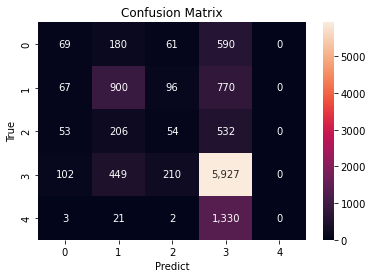

In [58]:
plot = sns.heatmap(CM, annot=True, fmt=',.0f')
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Original Code

In [ ]:
# # Leave-one-out cross validation cutting
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# print('X_train:', X_train.shape)
# print('X_test:', X_test.shape)

In [ ]:
# import lightgbm as lgb
# model = lgb.LGBMClassifier(is_unbalance=True)
# model.fit(X_train,y_train)

In [ ]:
# from sklearn.metrics import accuracy_score
# pred=model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, pred))

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# def plot_confusion_matrix(actual_val, pred_val, title=None):
    # confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   # rownames=['Actual'],
                                   # colnames=['Predicted'])
    
    # plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    # if title is None:
        # pass
    # else:
        # plot.set_title(title)
        
    # plt.show()
    # return confusion_matrix

In [ ]:
# import numpy as np
# q = np.array(y_test)
# q = q.reshape((-1,))
# print(q.shape)
# print(pred.shape)

In [ ]:
# plot_confusion_matrix(q, pred)